In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [1]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
start = '2010-01-01'
end = '2022-12-05'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515214
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526477
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422665
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410791
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.453412


In [4]:
# Date need not be the index of the dataframe.
df= df.reset_index()
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
3248,2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
3249,2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
3250,2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999
3251,2022-12-01,149.130005,146.610001,148.210007,148.309998,71250400.0,148.309998
3252,2022-12-02,148.000000,145.649994,145.960007,147.809998,65421400.0,147.809998


In [5]:
# Date and Adj Close aren't necessary columns.
df= df.drop(['Date', 'Adj Close'], axis= 1)
df.tail()

,High,Low,Open,Close,Volume
3248,146.639999,143.380005,145.139999,144.220001,69246000.0
3249,144.809998,140.350006,144.289993,141.169998,83763800.0
3250,148.720001,140.550003,141.399994,148.029999,111224400.0
3251,149.130005,146.610001,148.210007,148.309998,71250400.0
3252,148.000000,145.649994,145.960007,147.809998,65421400.0


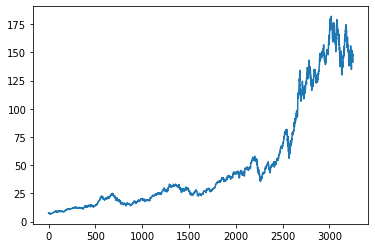

In [13]:
# plt.plot(df.Low)
# plt.plot(df.High)
plt.plot(df.Close)

In [21]:
# Moving Averages of previous 100 days for Closing Price.
ma100= df.Close.rolling(100).mean()

# Moving Averages of previous 200 days for Closing Price.
ma200= df.Close.rolling(200).mean()

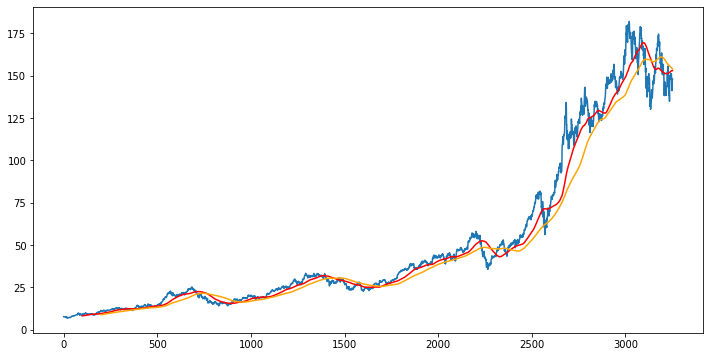

In [24]:
plt.figure(figsize= (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'orange')

In [28]:
# Splitting CLosing Price Data into Training and Testing
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape, data_testing.shape)

(2277, 1) (976, 1)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range= (0, 1))

In [27]:
data_training_array= scaler.fit_transform(data_training)

In [29]:
x_train= []
y_train= []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])     # the input for prediction is the previous 100 days closing values
  y_train.append(data_training_array[i, 0])         # the predicted value

x_train, y_train= np.array(x_train), np.array(y_train)

In [ ]:
# The ML Model

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [38]:
model= Sequential()

# 1st layer
model.add(LSTM(units= 50, activation= 'relu', return_sequences= True,
               input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

# 2nd layer
model.add(LSTM(units= 60, activation= 'relu', return_sequences= True))
model.add(Dropout(0.3))

# 3rd layer
model.add(LSTM(units= 80, activation= 'relu', return_sequences= True))
model.add(Dropout(0.4))

# 4th layer
model.add(LSTM(units= 120, activation= 'relu'))
model.add(Dropout(0.5))

# connecting all the above layers to a dense layer
model.add(Dense(units= 1)) # Units = 1 because we need to predict only one value, ie, the Closing Value

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [40]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
69/69 [==============================] - 27s 312ms/step - loss: 0.0341
Epoch 2/50
69/69 [==============================] - 21s 311ms/step - loss: 0.0085
Epoch 3/50
69/69 [==============================] - 21s 308ms/step - loss: 0.0055
Epoch 4/50
69/69 [==============================] - 21s 304ms/step - loss: 0.0055
Epoch 5/50
69/69 [==============================] - 25s 357ms/step - loss: 0.0043
Epoch 6/50
69/69 [==============================] - 21s 302ms/step - loss: 0.0048
Epoch 7/50
69/69 [==============================] - 21s 303ms/step - loss: 0.0046
Epoch 8/50
69/69 [==============================] - 21s 304ms/step - loss: 0.0074
Epoch 9/50
69/69 [==============================] - 21s 307ms/step - loss: 0.0035
Epoch 10/50
69/69 [==============================] - 21s 311ms/step - loss: 0.0035
Epoch 11/50
69/69 [==============================] - 23s 337ms/step - loss: 0.0037
Epoch 12/50
69/69 [==============================] - 22s 316ms/step - loss: 0.0039
Epoch 13/50
6

In [41]:
model.save('keras_model001.h5')

In [42]:
data_testing.head()

,Close
2277,38.325001
2278,38.480000
2279,38.174999
2280,39.439999
2281,39.075001


In [43]:
data_training.tail(100)

,Close
2177,54.485001
2178,54.924999
2179,55.744999
2180,56.257500
2181,56.907501
...,...
2272,37.500000
2273,38.267502
2274,38.735001
2275,38.965000


In [44]:
past_100_days= data_training.tail(100) # appending the past 100 days to data_testing.

In [45]:
final_df= past_100_days.append(data_testing, ignore_index= True)

In [46]:
final_df.head()

,Close
0,54.485001
1,54.924999
2,55.744999
3,56.257500
4,56.907501


In [47]:
input_data= scaler.fit_transform(final_df)
input_data

array([[0.12929931],
       [0.13230349],
       [0.13790219],
       ...,
       [0.76799524],
       [0.76990698],
       [0.76649314]])

In [48]:
input_data.shape

(1076, 1)

In [49]:
x_test= []
y_test= []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0]) # the 0th column of ith row.

In [50]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(976, 100, 1) (976,)


In [51]:
# Making Predictions

y_predicted= model.predict(x_test)
y_predicted.shape

31/31 [==============================] - 4s 93ms/step


(976, 1)

In [52]:
y_test

array([0.0189639 , 0.02002218, 0.01793974, 0.02657676, 0.02408467,
       0.02131943, 0.03936161, 0.04139285, 0.04152941, 0.04960314,
       0.05460441, 0.05470684, 0.049074  , 0.04816933, 0.04649653,
       0.04898865, 0.04777672, 0.04883503, 0.04818639, 0.04905691,
       0.05093454, 0.04927882, 0.05253905, 0.05468976, 0.05486046,
       0.05578219, 0.05284628, 0.05595289, 0.05745499, 0.05690876,
       0.05518478, 0.05173679, 0.05243663, 0.06266108, 0.06609201,
       0.06745755, 0.07090551, 0.07498506, 0.07822822, 0.0756849 ,
       0.07846719, 0.09029614, 0.08340019, 0.07945721, 0.07612869,
       0.07899633, 0.07942306, 0.08152257, 0.08372451, 0.08846975,
       0.09073996, 0.09132031, 0.09355637, 0.09884784, 0.09782367,
       0.09973542, 0.09688486, 0.09674831, 0.0973628 , 0.09739694,
       0.10401981, 0.10526585, 0.10640949, 0.1114449 , 0.1108987 ,
       0.10768968, 0.1060169 , 0.10654605, 0.09982077, 0.11663396,
       0.11429546, 0.11873346, 0.11315182, 0.10355893, 0.10362

In [53]:
y_predicted

array([[0.08720604],
       [0.08680785],
       [0.08643457],
       [0.0860886 ],
       [0.08576679],
       [0.08547381],
       [0.08521011],
       [0.0849686 ],
       [0.08475871],
       [0.08458796],
       [0.08445908],
       [0.08438185],
       [0.08436854],
       [0.08442909],
       [0.08456121],
       [0.084759  ],
       [0.08501072],
       [0.08530158],
       [0.08560649],
       [0.08592249],
       [0.08624393],
       [0.08656648],
       [0.08688825],
       [0.0872054 ],
       [0.08751789],
       [0.08782768],
       [0.08813646],
       [0.0884465 ],
       [0.08875597],
       [0.08906594],
       [0.08937803],
       [0.08969223],
       [0.09000601],
       [0.09031324],
       [0.09061033],
       [0.09090453],
       [0.09120587],
       [0.09152502],
       [0.0918746 ],
       [0.09226847],
       [0.09271827],
       [0.09322834],
       [0.093806  ],
       [0.09446286],
       [0.09519461],
       [0.09598631],
       [0.09681723],
       [0.097

In [56]:
scaler.scale_ # the factor by which we shall scale the data up

array([0.00682769])

In [55]:
scale_factor= 1/0.00682769
y_predicted= y_predicted * scale_factor
y_test= y_test * scale_factor

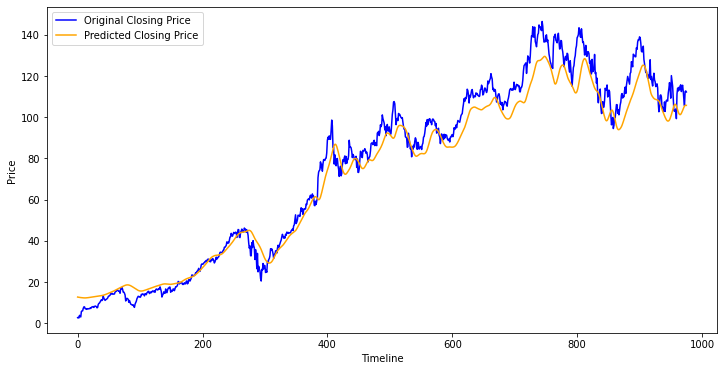

In [62]:
plt.figure(figsize= (12, 6))
plt.plot(y_test, 'blue', label= 'Original Closing Price')
plt.plot(y_predicted, 'orange', label= 'Predicted Closing Price')
plt.xlabel('Timeline')
plt.ylabel('Price')
plt.legend()
plt.show()